<a href="https://colab.research.google.com/github/iamviji/project/blob/master/PostMidTerm/misc/Modulation_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

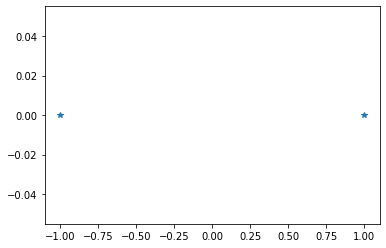

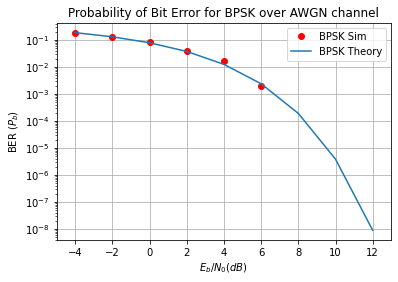

In [97]:
#%Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
#% © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**3 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()


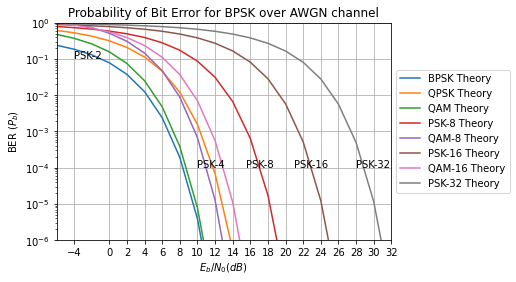

[8.90021307e-01 8.61802010e-01 8.26529568e-01 7.82625351e-01
 7.28338353e-01 6.61914789e-01 5.81982213e-01 4.88292038e-01
 3.82951785e-01 2.72040682e-01 1.66734644e-01 8.17173450e-02
 2.84122564e-02 5.79796362e-03 5.13971267e-04 1.22713413e-05
 3.69343615e-08 4.20011222e-12 2.66876751e-18 4.57517515e-28]


In [2]:
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=-6,stop = 33, step = 2)
BPSK_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QPSK_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BPSK_BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.semilogy(EbN0dBs,QPSK_BER_theory,marker='',linestyle='-',label='QPSK Theory')
ax.semilogy(EbN0dBs,QAM_BER_theory,marker='',linestyle='-',label='QAM Theory')
ax.semilogy(EbN0dBs,PSK_8_BER_theory,marker='',linestyle='-',label='PSK-8 Theory')
ax.semilogy(EbN0dBs,QAM_8_BER_theory,marker='',linestyle='-',label='QAM-8 Theory')
ax.semilogy(EbN0dBs,PSK_16_BER_theory,marker='',linestyle='-',label='PSK-16 Theory')
ax.semilogy(EbN0dBs,QAM_16_BER_theory,marker='',linestyle='-',label='QAM-16 Theory')
ax.semilogy(EbN0dBs,PSK_32_BER_theory,marker='',linestyle='-',label='PSK-32 Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_ylim(0.000001,1);
ax.grid(True);
ax.set_xlim(-6,30);
ax.grid(True);
ax.legend();
x = [-4,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
#x = [-4,0,4,8,12,16,20,24,28,32]
plt.xticks(x)
plt.text(-4, 0.1, 'PSK-2')
#plt.text(6.5, 0.001, 'QAM-8')
plt.text(10, 0.0001, 'PSK-4')
plt.text(15.5, 0.0001, 'PSK-8')
plt.text(21, 0.0001, 'PSK-16')
plt.text(28, 0.0001, 'PSK-32')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.get_legend().remove()
plt.show()
print (PSK_16_BER_theory)